In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sb

In [3]:
data = pd.read_csv('placement.csv')
data.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


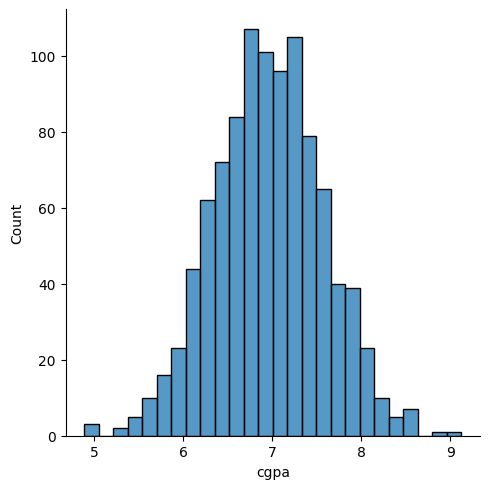

In [7]:
sb.displot(data['cgpa'])

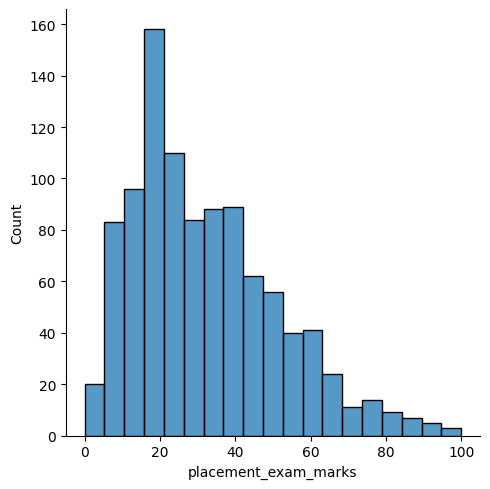

In [8]:
sb.displot(data['placement_exam_marks'])

<Axes: ylabel='placement_exam_marks'>

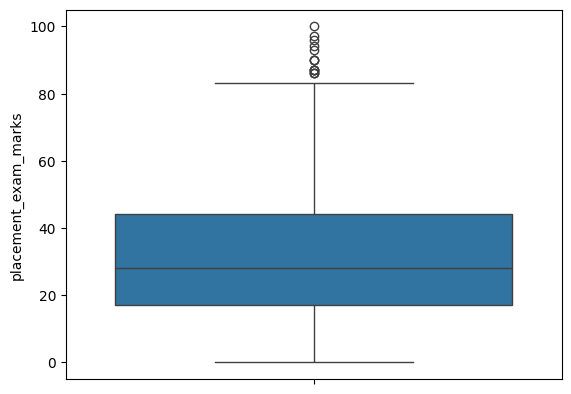

In [9]:
sb.boxplot(data['placement_exam_marks'])

#**detecting the outliers**

In [12]:
percent75 = data['placement_exam_marks'].quantile(0.75)
percent25 = data['placement_exam_marks'].quantile(0.25)

percent75, percent25

(np.float64(44.0), np.float64(17.0))

In [13]:
iqr = percent75 - percent25
iqr

np.float64(27.0)

In [15]:
upper_limit = percent75 + 1.5 * iqr
lower_limit = percent25 - 1.5 * iqr

upper_limit, lower_limit

(np.float64(81.0), np.float64(-23.5))

#** findind the outliers in the dataframe**

In [20]:
new_data = data[(data['placement_exam_marks'] > upper_limit) | (data['placement_exam_marks'] < lower_limit)]

new_data

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
403,6.71,83.0,0


#**now it's time to handle the outliers**

#**using trimming method**

In [36]:
data = pd.read_csv('placement.csv')
data.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


<Axes: ylabel='placement_exam_marks'>

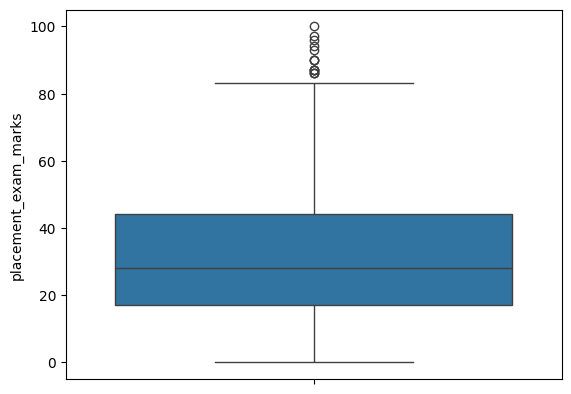

In [38]:
sb.boxplot(data['placement_exam_marks'])

In [37]:
new_data =  data[(data['placement_exam_marks'] < upper_limit) & (data['placement_exam_marks'] > lower_limit)]
new_data

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


<Axes: ylabel='placement_exam_marks'>

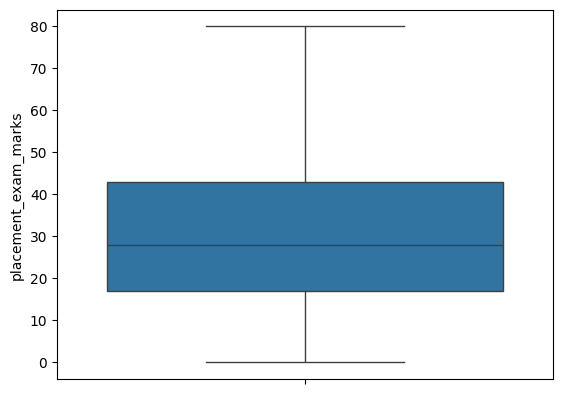

In [39]:
sb.boxplot(new_data['placement_exam_marks'])

#**using capping method**

In [40]:
data = pd.read_csv('placement.csv')
data.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


<Axes: ylabel='placement_exam_marks'>

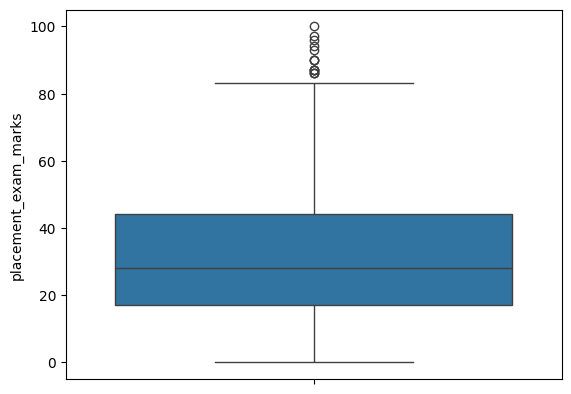

In [44]:
sb.boxplot(data['placement_exam_marks'])

In [43]:
new_data = data.copy()

new_data['placement_exam_marks'] = np.where(
    new_data['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_data['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_data['placement_exam_marks']
    )
)


new_data

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


<Axes: ylabel='placement_exam_marks'>

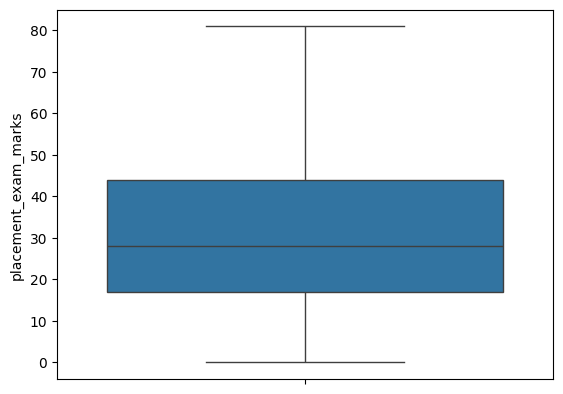

In [45]:
sb.boxplot(new_data['placement_exam_marks'])